# Loan Default Prediction Project

This project explores patterns, correlations, and risk indicators associated with loan default behavior using a filtered LendingClub-style loan dataset. The notebook performs a structured exploratory data analysis to understand which borrower attributes are most associated with default outcomes.

### Exploratory Data Analysis

The notebook performs:
* Data import and exploration
* Distribution analysis of credit scores (FICO ranges)
* Visualization of loan outcomes
* Examination of loan grades and default rates
* Relationship analysis using boxplots, histograms, and countplots
* Pareto analysis of loan purposes among defaulted borrowers
* Correlation heatmapping of key numerical variables
* This EDA forms the foundation for a future predictive modeling workflow

### Imported Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [49]:
df = pd.read_csv("../filtered.csv")

### FICO Score Distribution Analysis

From the distribution, you can see that the FICO low and high distributions look essentially identical between Loans that defaulted and Loans that were fully paid. 

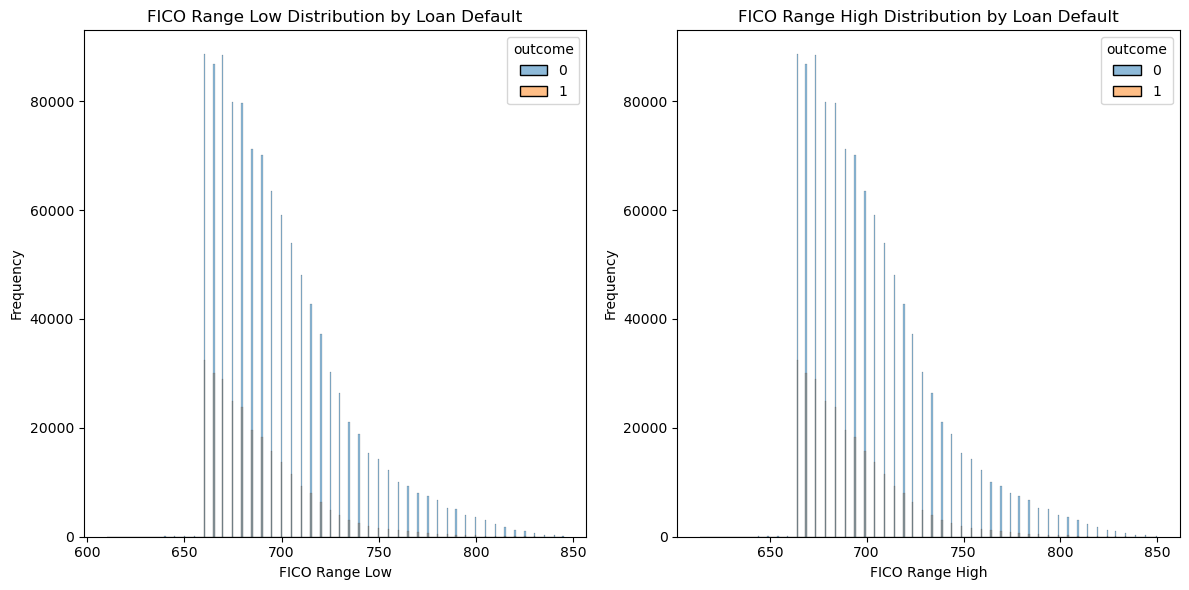

In [41]:
#distribtuion of fico credit scores based on outcomes
fig, axes= plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='fico_range_low', hue='outcome', ax=axes[0])
axes[0].set_title("FICO Range Low Distribution by Loan Default")
axes[0].set_xlabel("FICO Range Low")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df, x='fico_range_high', hue='outcome', ax=axes[1])
axes[1].set_title("FICO Range High Distribution by Loan Default")
axes[1].set_xlabel("FICO Range High")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Distribution of Approved Loan Outcomes

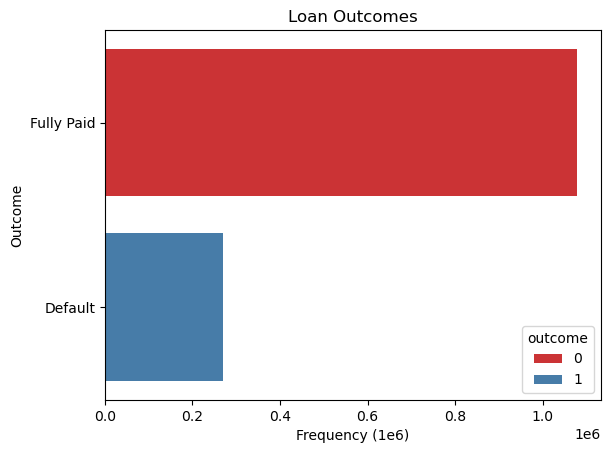

In [9]:
#overall outcomes
sns.countplot(data=df, y = "outcome", hue = "outcome", palette = "Set1")
plt.title("Loan Outcomes")
plt.yticks([1, 0], ["Default", "Fully Paid"])
plt.ylabel("Outcome")
plt.xlabel("Frequency (1e6)") 
plt.show()

### Distribution of Loan Grades by Loan Outcome

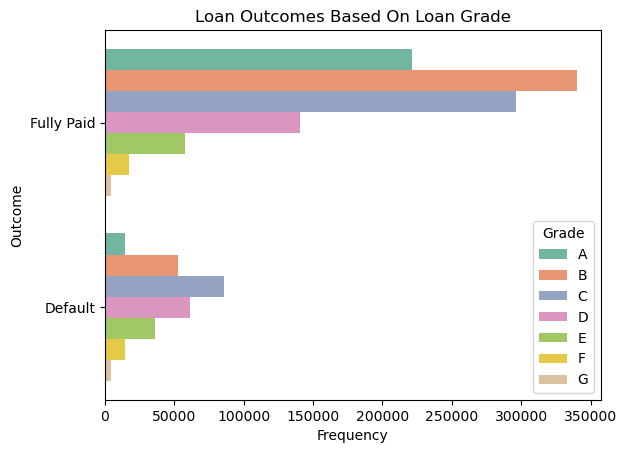

In [59]:
#Loan Grade

ax = sns.countplot(data=df, y = "outcome", 
              hue = "grade", hue_order = sorted(df['grade'].unique()),
              palette = "Set2")
plt.title("Loan Outcomes Based On Loan Grade")
plt.yticks([1, 0], ["Default", "Fully Paid"])
plt.ylabel("Outcome")
plt.xlabel("Frequency") 

ax.legend(title = "Grade")

plt.show()

#fully paid seems to be more skewed right (despite grade being a categorical variable)
#defaulted loans have a more normal distribution

### Distribution of Loan Outcomes by Term

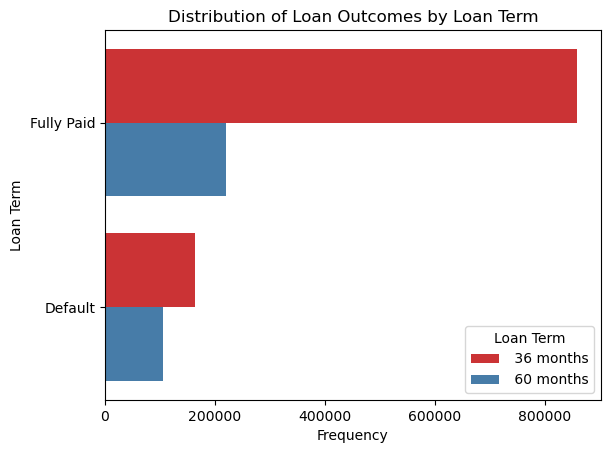

In [57]:
ax = sns.countplot(data = df, y = "outcome", 
              hue = "term", 
              palette = "Set1")

plt.ylabel("Loan Term")
plt.xlabel("Frequency")
plt.yticks([1, 0], ["Default", "Fully Paid"])
plt.title("Distribution of Loan Outcomes by Loan Term")

ax.legend(title = "Loan Term")

plt.show()

# 60 month term loans made up a much larger portion of the defaulted loans than the fully paid loan

### Loan Interest Rate by Loan Outcome

Text(0.5, 0, 'Interest Rate')

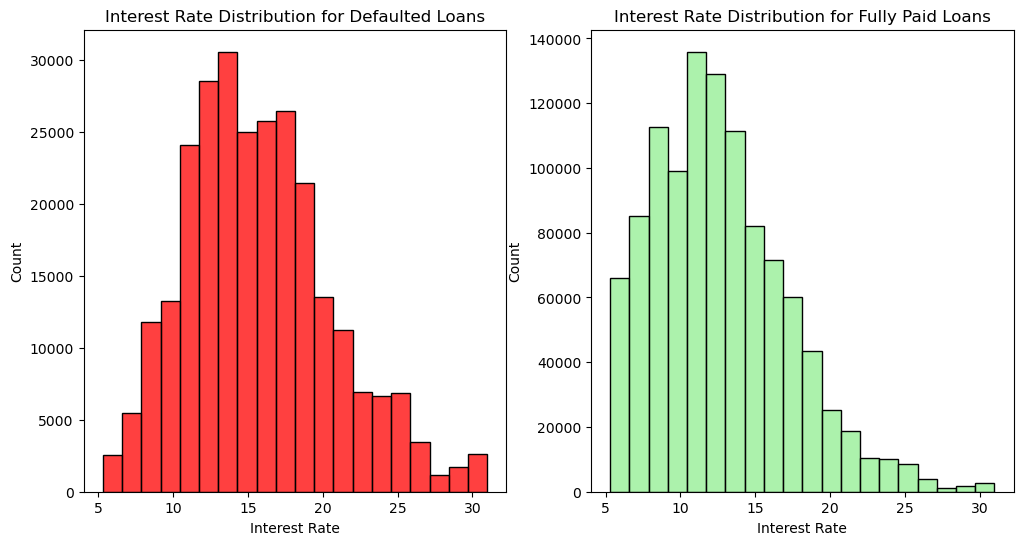

In [11]:
#interest rate
default_df = df[df['outcome'] == 0]
fully_df = df[df['outcome'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data = default_df, x = "int_rate", bins = 20, ax = axes[0], color = "red")
axes[0].set_title("Interest Rate Distribution for Defaulted Loans")
axes[0].set_xlabel("Interest Rate")


sns.histplot(data = fully_df, x = "int_rate", bins = 20, ax = axes[1], color = "lightgreen")
axes[1].set_title("Interest Rate Distribution for Fully Paid Loans")
axes[1].set_xlabel("Interest Rate")

#Defaulted loans tend to have a more normal distribution that's slightly skewed high, but fully paid loans are definitively skewed high


### Annual Income of Individuals Based on Loan Outcome

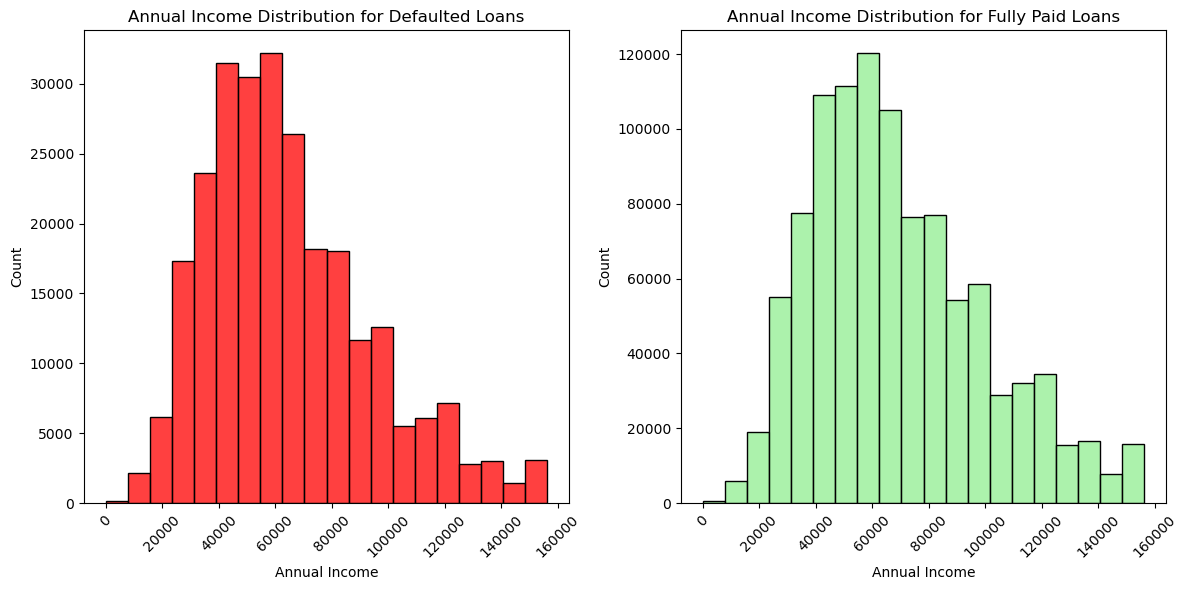

In [17]:
#outlier removal function
def remove_outliers_iqr(df, cols, k=1.5):
    df_clean = df.copy()
    #using IQR method
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

#remove outliers from selected numeric features
numeric_cols = ["annual_inc"]
df_clean = remove_outliers_iqr(df, numeric_cols)



#annual income
default_df = df_clean[df_clean['outcome'] == 1]
fully_df = df_clean[df_clean['outcome'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data = default_df, x = "annual_inc", bins = 20, ax = axes[0], color = "red")
axes[0].set_title("Annual Income Distribution for Defaulted Loans")
axes[0].set_xlabel("Annual Income")
axes[0].tick_params(axis='x', rotation=45)



sns.histplot(data = fully_df, x = "annual_inc", bins = 20, ax = axes[1], color = "lightgreen")
axes[1].set_title("Annual Income Distribution for Fully Paid Loans")
axes[1].set_xlabel("Annual Income")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
#nearly identical distributions

### DTI Distribution Based on Loan Outcome

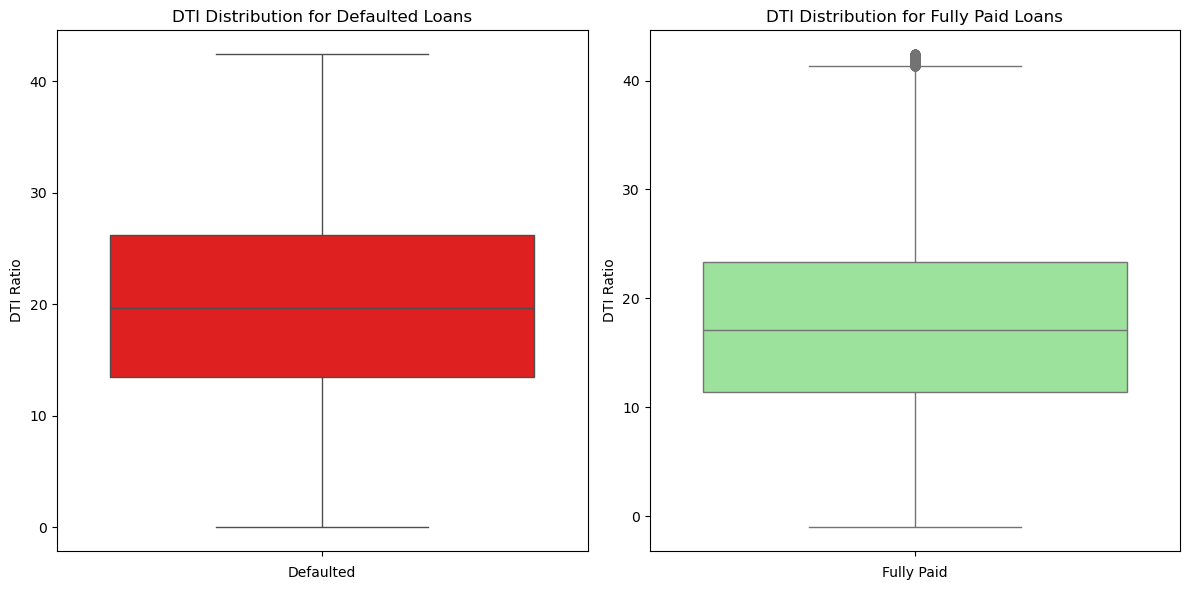

In [13]:
#remove outliers
numeric_cols = ["dti"]
df_clean = remove_outliers_iqr(df, numeric_cols)

default_df = df_clean[df_clean['outcome'] == 0]
fully_df = df_clean[df_clean['outcome'] == 1]

#dti ratio
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for defaulted loans
sns.boxplot(data=default_df, y="dti", color="red", ax=axes[0])
axes[0].set_title("DTI Distribution for Defaulted Loans")
axes[0].set_ylabel("DTI Ratio")
axes[0].set_xlabel("Defaulted")

# Boxplot for fully paid loans
sns.boxplot(data=fully_df, y="dti", color="lightgreen", ax=axes[1])
axes[1].set_title("DTI Distribution for Fully Paid Loans")
axes[1].set_ylabel("DTI Ratio")
axes[1].set_xlabel("Fully Paid")

plt.tight_layout()
plt.show()


#nearly identical distributions when excluding outliers

### Loan Purpose Between Defaults and Fully-Paid Loans

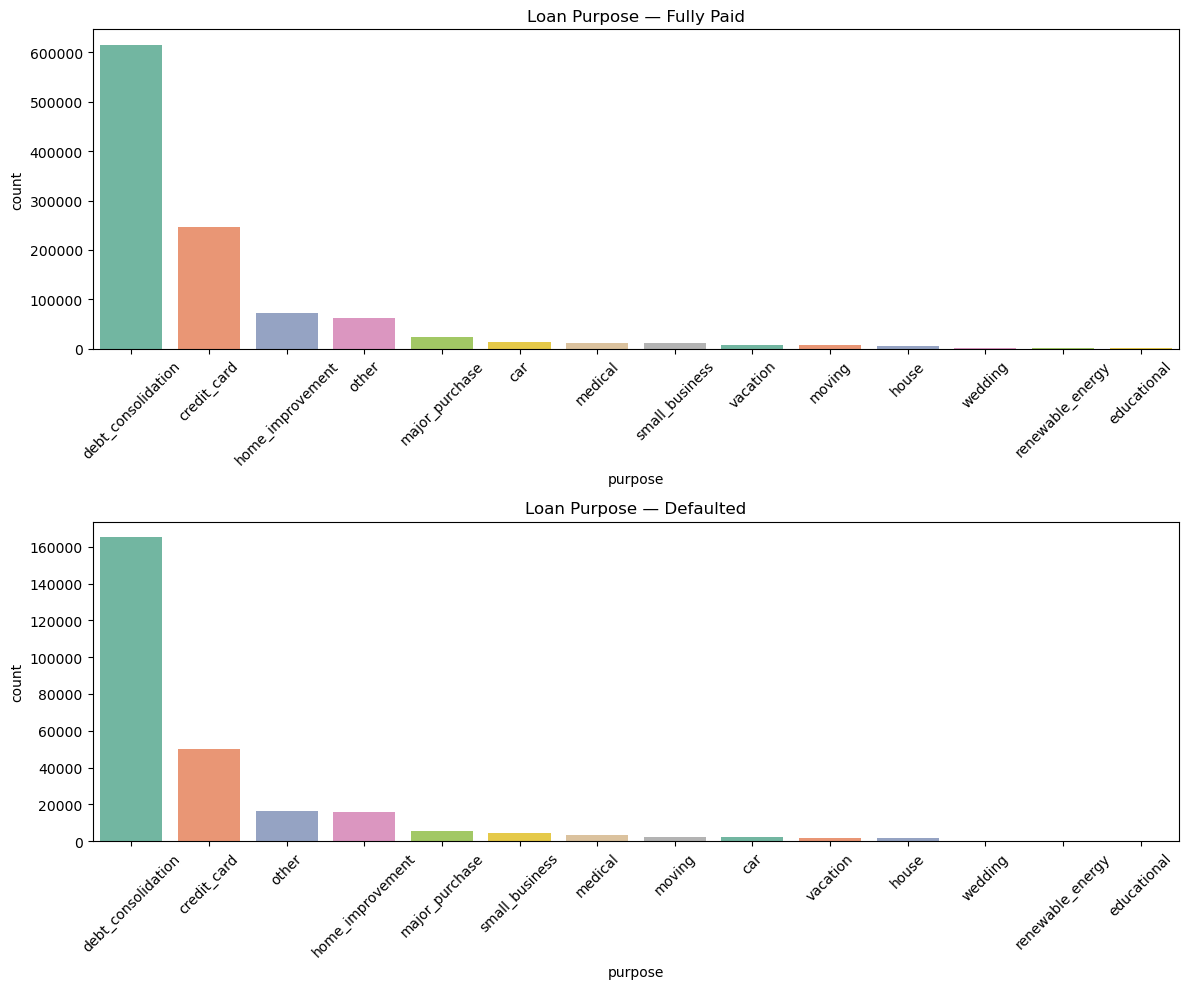

In [86]:
fully_paid = df[df['outcome'] == 0]
default = df[df['outcome'] == 1]

# value counts
purpose_counts_fp = fully_paid['purpose'].value_counts().reset_index()
purpose_counts_fp.columns = ['purpose', 'count']

purpose_counts_d = default['purpose'].value_counts().reset_index()
purpose_counts_d.columns = ['purpose', 'count']

# cumulative percentages
purpose_counts_fp['cumperc'] = (
    purpose_counts_fp['count'].cumsum() / purpose_counts_fp['count'].sum() * 100
)

purpose_counts_d['cumperc'] = (
    purpose_counts_d['count'].cumsum() / purpose_counts_d['count'].sum() * 100
)

# subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# subplot 1 — fully paid
sns.barplot(
    data=purpose_counts_fp,
    x="purpose",
    y="count",
    ax=axes[0],
    hue="purpose",
    palette="Set2",
    order=purpose_counts_fp["purpose"]
)
axes[0].set_title("Loan Purpose — Fully Paid")
axes[0].tick_params(axis='x', rotation=45)

# subplot 2 — default
sns.barplot(
    data=purpose_counts_d,
    x="purpose",
    y="count",
    ax=axes[1],
    hue="purpose",
    palette="Set2",
    order=purpose_counts_d["purpose"]
)
axes[1].set_title("Loan Purpose — Defaulted")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Feature Heatmap

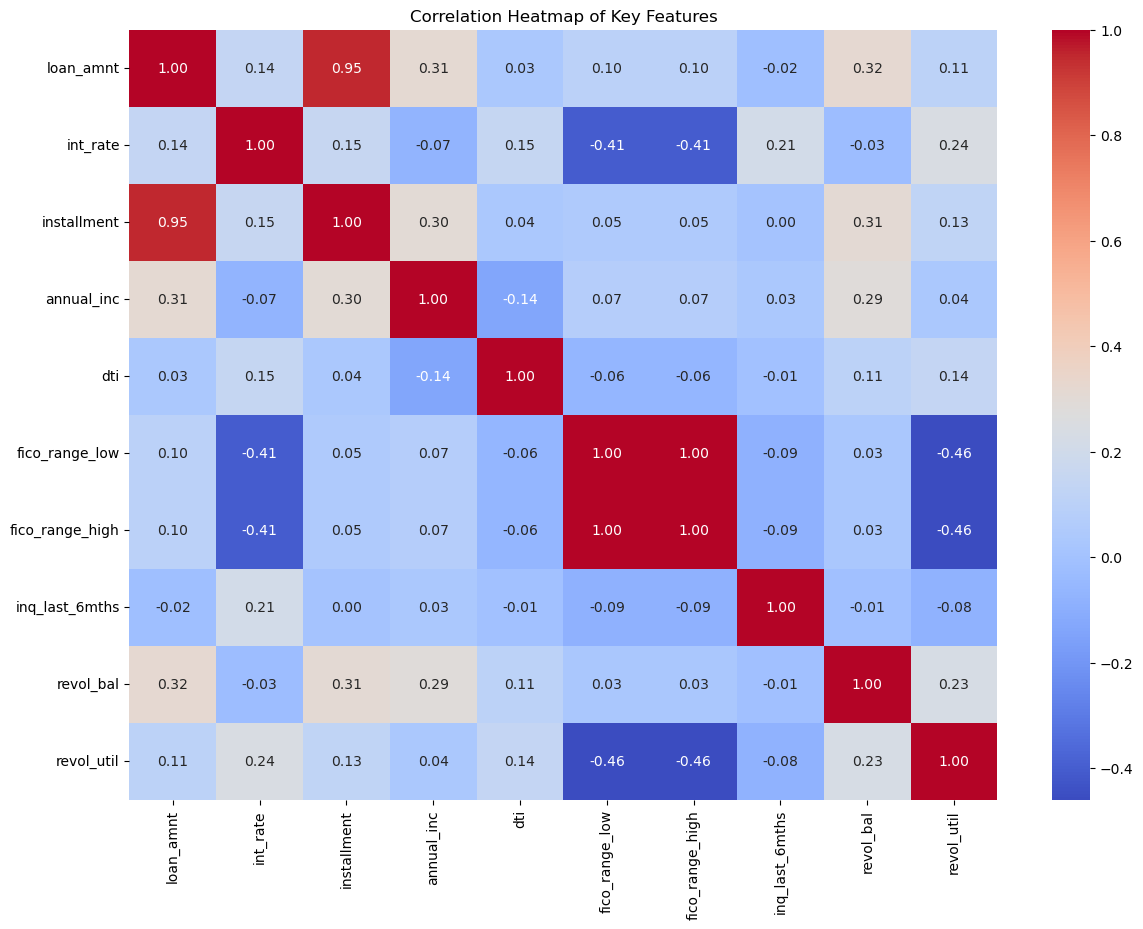

In [95]:
#heat map
heatmap_vars = [
    "loan_amnt","int_rate","installment",
    "annual_inc","dti",
    "fico_range_low","fico_range_high",
    "inq_last_6mths",
    "revol_bal","revol_util"
]

plt.figure(figsize=(14,10))
sns.heatmap(df[heatmap_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()